# ROC curves
## Comparison of different trainings with different setups for inference

In [1]:
# Hendrik Schönen
# This script plots ROC curves
# It requires the datapoints created by scripts/plot_roc.py

import numpy as np
import pandas
import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.cms.style.ROOT)
plt.rcParams['axes.axisbelow'] = True

In [17]:
model_names = ['nominal','fgsm-0_05','fgsm-0_075','fgsm-0_1']#
prediction_names = ['nominal','fgsm-0_025','fgsm-0_05','fgsm-0_075','fgsm-0_1','fgsm-0_125','fgsm-0_15']#'fgsm-0_025','fgsm-0_05','fgsm-0_075','fgsm-0_1','fgsm-0_125','fgsm-0_15']
model_dir = '/net/scratch_cms3a/hschoenen/deepjet/results/'
save_dir = '/net/scratch_cms3a/hschoenen/deepjet/plots/roc_curves/'

In [18]:
model_labels = {
    'nominal': 'nominal training',
    'fgsm-0_01': r'fgsm training $\epsilon=0.01$',
    'fgsm-0_025': r'fgsm training $\epsilon=0.025$',
    'fgsm-0_05': r'fgsm training $\epsilon=0.05$',
    'fgsm-0_075': r'fgsm training $\epsilon=0.075$',
    'fgsm-0_1': r'fgsm training $\epsilon=0.1$',
    'fgsm-0_125': r'fgsm training $\epsilon=0.125$',
    'fgsm-0_15': r'fgsm training $\epsilon=0.15$',
}

prediction_labels = {
    'nominal': 'nominal inputs',
    'fgsm-0_01': r'fgsm inputs $\epsilon=0.01$',
    'fgsm-0_025': r'fgsm inputs $\epsilon=0.025$',
    'fgsm-0_05': r'fgsm inputs $\epsilon=0.05$',
    'fgsm-0_075': r'fgsm inputs $\epsilon=0.075$',
    'fgsm-0_1': r'fgsm inputs $\epsilon=0.1$',
    'fgsm-0_125': r'fgsm inputs $\epsilon=0.125$',
    'fgsm-0_15': r'fgsm inputs $\epsilon=0.15$',
}

# decide, whether models are plotted in different colors or linestyles
model_linestyles = True

linestyles = ['solid','dashed','dotted','dashdot']
colors = ['tab:blue','tab:orange','tab:green', 'tab:purple','tab:red',  'tab:olive', 'tab:cyan', 'tab:pink', 'tab:brown', 'tab:grey']

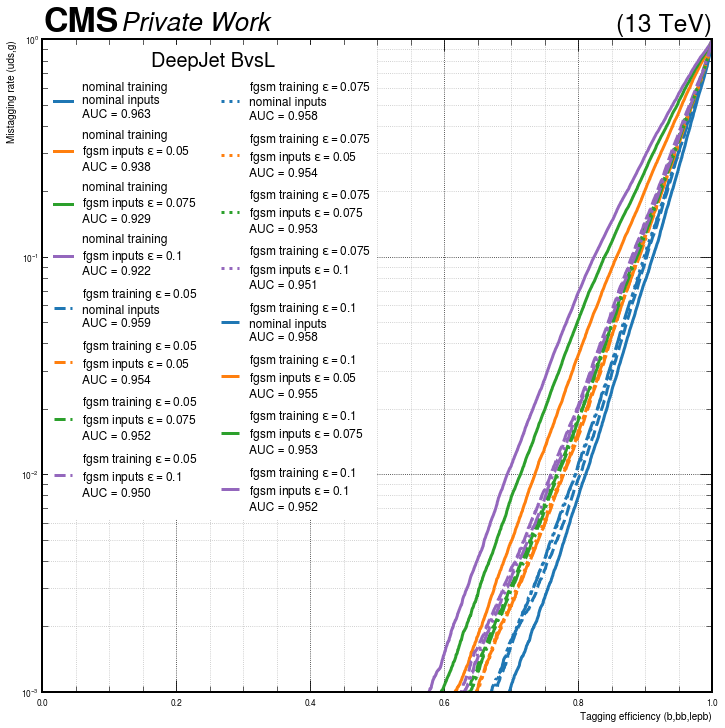

In [4]:
# BvsL
fig,ax = plt.subplots(figsize=[12,12])
plt.style.use(hep.cms.style.ROOT)
ax.set_xlim(left=0.,right=1)
ax.set_yscale('log')
ax.set_ylim(bottom=1e-3)
ax.set_ylim(top=1)

tag_name = ' (b,bb,lepb)'
mistag_name = ' (uds,g)'

ax.set_ylabel('Mistagging rate'+mistag_name)
ax.set_xlabel('Tagging efficiency'+tag_name)
ax.grid(which='minor', alpha=0.85)
ax.grid(which='major', alpha=0.95, color='black')

legtitle = 'BvsL'
legloc = 'upper left'
title=''
for i,model in enumerate(model_names):
    title = title + model + '_'
    for j,prediction in enumerate(prediction_names):
        xya = np.load(model_dir+model+'/predict_'+prediction+'/BvL.npy', allow_pickle=True)
        legend_text = model_labels[model] + '\n' + prediction_labels[prediction] + '\n' + 'AUC = ' + f'{xya[2,0]:.3f}'
        if model_linestyles:
            ax.plot(xya[0], xya[1], linestyle=linestyles[i], color=colors[j], linewidth=3.0, label=legend_text)
        else:
            ax.plot(xya[0], xya[1], linestyle=linestyles[j], color=colors[i], linewidth=3.0, label=legend_text)
# make ROC=0.5 line
#ax.plot(np.arange(1e-3,1,1e-3),np.arange(1e-3,1,1e-3), color='black')
# make legend
if len(model_names)*len(prediction_names)<8:
    leg = ax.legend(title='DeepJet '+legtitle,loc=legloc,fontsize=16,title_fontsize=20,labelspacing=0.7,frameon=True,framealpha=1,facecolor='white')
else:
    leg = ax.legend(title='DeepJet '+legtitle,loc=legloc,ncols=2,fontsize=12,title_fontsize=20,labelspacing=0.7,frameon=True,framealpha=1,facecolor='white')
if 'right' in legloc:
    aligned = 'right'
else:
    aligned = 'left'
leg._legend_box.align = aligned
if len(model_names)*len(prediction_names)>8:
    leg._legend_box.align = 'center'
leg.get_frame().set_linewidth(0.0)
hep.cms.label(llabel='Private Work',rlabel='(13 TeV)')
fig.savefig(save_dir + title + '_BvsL_ROC.pdf', bbox_inches='tight')
fig.savefig('ROC_BvsL.pdf', bbox_inches='tight')

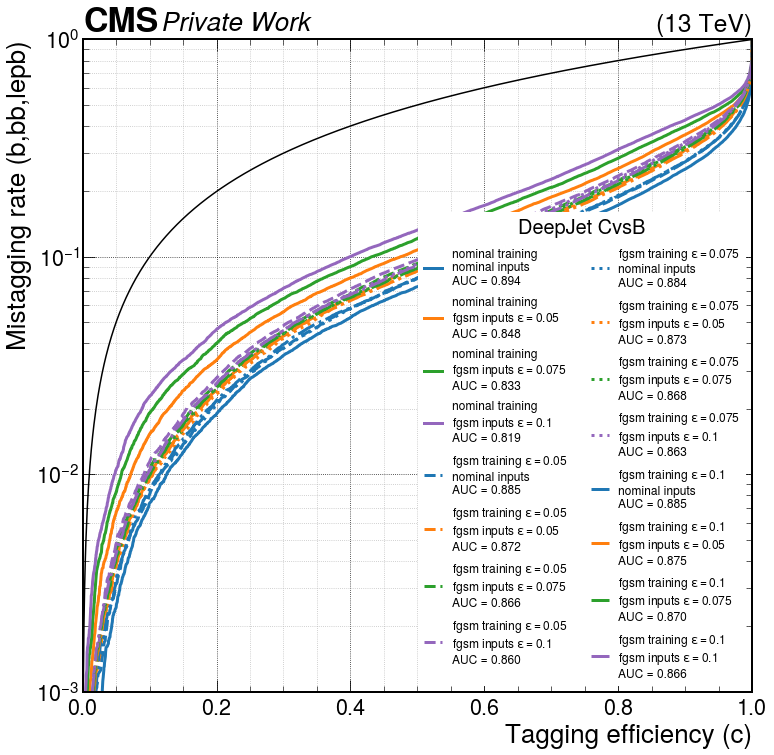

In [5]:
# CvsB
fig,ax = plt.subplots(figsize=[12,12])
plt.style.use(hep.cms.style.ROOT)
ax.set_xlim(left=0.,right=1)
ax.set_yscale('log')
ax.set_ylim(bottom=1e-3)
ax.set_ylim(top=1)

tag_name = ' (c)'
mistag_name = ' (b,bb,lepb)'

ax.set_ylabel('Mistagging rate'+mistag_name)
ax.set_xlabel('Tagging efficiency'+tag_name)
ax.grid(which='minor', alpha=0.85)
ax.grid(which='major', alpha=0.95, color='black')

legtitle = 'CvsB'
legloc = 'lower right'
title=''
for i,model in enumerate(model_names):
    title = title + model + '_'
    for j,prediction in enumerate(prediction_names):
        xya = np.load(model_dir+model+'/predict_'+prediction+'/CvB.npy', allow_pickle=True)
        legend_text = model_labels[model] + '\n' + prediction_labels[prediction] + '\n' + 'AUC = ' + f'{xya[2,0]:.3f}'
        if model_linestyles:
            ax.plot(xya[0], xya[1], linestyle=linestyles[i], color=colors[j], linewidth=3.0, label=legend_text)
        else:
            ax.plot(xya[0], xya[1], linestyle=linestyles[j], color=colors[i], linewidth=3.0, label=legend_text)
# make ROC=0.5 line
ax.plot(np.arange(1e-3,1,1e-3),np.arange(1e-3,1,1e-3), color='black')
# make legend
if len(model_names)*len(prediction_names)<8:
    leg = ax.legend(title='DeepJet '+legtitle,loc=legloc,fontsize=16,title_fontsize=20,labelspacing=0.7,frameon=True,framealpha=1,facecolor='white')
else:
    leg = ax.legend(title='DeepJet '+legtitle,loc=legloc,ncols=2,fontsize=12,title_fontsize=20,labelspacing=0.7,frameon=True,framealpha=1,facecolor='white')
if 'right' in legloc:
    aligned = 'right'
else:
    aligned = 'left'
leg._legend_box.align = aligned
if len(model_names)*len(prediction_names)>8:
    leg._legend_box.align = 'center'
leg.get_frame().set_linewidth(0.0)
hep.cms.label(llabel='Private Work',rlabel='(13 TeV)')
fig.savefig(save_dir + title + '_CvsB_ROC.pdf', bbox_inches='tight')
fig.savefig('ROC_CvsB.pdf', bbox_inches='tight')

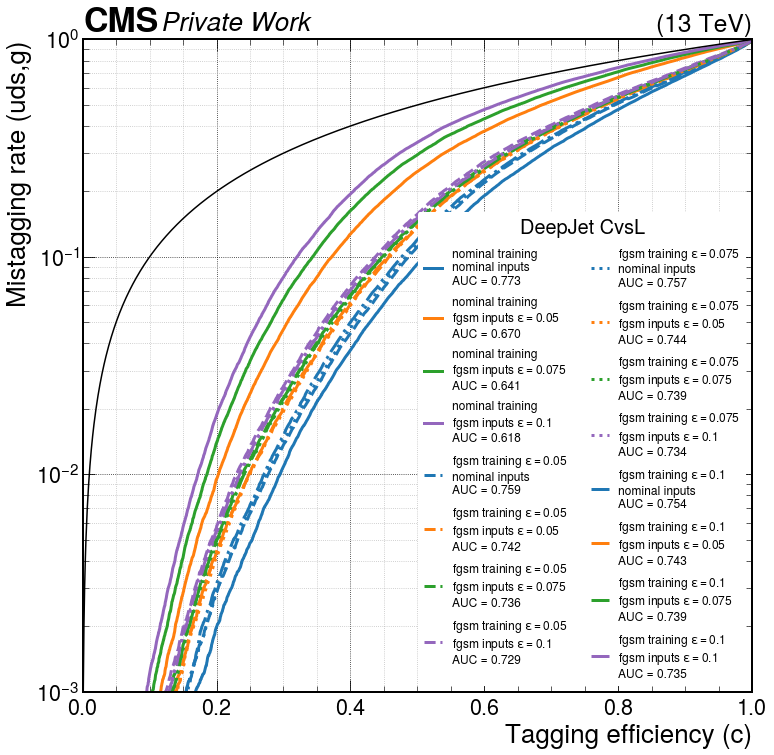

In [6]:
# CvsL
fig,ax = plt.subplots(figsize=[12,12])
plt.style.use(hep.cms.style.ROOT)
ax.set_xlim(left=0.,right=1)
ax.set_yscale('log')
ax.set_ylim(bottom=1e-3)
ax.set_ylim(top=1)

tag_name = ' (c)'
mistag_name = ' (uds,g)'

ax.set_ylabel('Mistagging rate'+mistag_name)
ax.set_xlabel('Tagging efficiency'+tag_name)
ax.grid(which='minor', alpha=0.85)
ax.grid(which='major', alpha=0.95, color='black')

legtitle = 'CvsL'
legloc = 'lower right'
title=''
for i,model in enumerate(model_names):
    title = title + model + '_'
    for j,prediction in enumerate(prediction_names):
        xya = np.load(model_dir+model+'/predict_'+prediction+'/CvL.npy', allow_pickle=True)
        legend_text = model_labels[model] + '\n' + prediction_labels[prediction] + '\n' + 'AUC = ' + f'{xya[2,0]:.3f}'
        if model_linestyles:
            ax.plot(xya[0], xya[1], linestyle=linestyles[i], color=colors[j], linewidth=3.0, label=legend_text)
        else:
            ax.plot(xya[0], xya[1], linestyle=linestyles[j], color=colors[i], linewidth=3.0, label=legend_text)
# make ROC=0.5 line
ax.plot(np.arange(1e-3,1,1e-3),np.arange(1e-3,1,1e-3), color='black')
# make legend
if len(model_names)*len(prediction_names)<8:
    leg = ax.legend(title='DeepJet '+legtitle,loc=legloc,fontsize=16,title_fontsize=20,labelspacing=0.7,frameon=True,framealpha=1,facecolor='white')
else:
    leg = ax.legend(title='DeepJet '+legtitle,loc=legloc,ncols=2,alignment='center',fontsize=12,title_fontsize=20,labelspacing=0.7,frameon=True,framealpha=1,facecolor='white')
if 'right' in legloc:
    aligned = 'right'
else:
    aligned = 'left'
leg._legend_box.align = aligned
if len(model_names)*len(prediction_names)>8:
    leg._legend_box.align = 'center'
leg.get_frame().set_linewidth(0.0)
hep.cms.label(llabel='Private Work',rlabel='(13 TeV)')
fig.savefig(save_dir + title + '_CvsL_ROC.pdf', bbox_inches='tight')
fig.savefig('ROC_CvsL.pdf', bbox_inches='tight')

In [19]:
# create a Latex table for the AUC values
BvsL_AUC = np.zeros((len(model_names),len(prediction_names)))
CvsB_AUC = np.zeros((len(model_names),len(prediction_names)))
CvsL_AUC = np.zeros((len(model_names),len(prediction_names)))

for i,model in enumerate(model_names):
    for j,prediction in enumerate(prediction_names):
        xya = np.load(model_dir+model+'/predict_'+prediction+'/BvL.npy', allow_pickle=True)
        BvsL_AUC[i,j] = xya[2,0]
        xya = np.load(model_dir+model+'/predict_'+prediction+'/CvB.npy', allow_pickle=True)
        CvsB_AUC[i,j] = xya[2,0]
        xya = np.load(model_dir+model+'/predict_'+prediction+'/CvL.npy', allow_pickle=True)
        CvsL_AUC[i,j] = xya[2,0]

discriminators = [BvsL_AUC,CvsB_AUC,CvsL_AUC]
discriminator_names = ['BvsL','CvsB','CvsL']
for n,AUC_array in enumerate(discriminators):
    print('\\begin{table}[h]')
    print('\\label{' + 'tab:AUC_{}'.format(discriminator_names[n])+'}')
    print('\\caption{'+'{} AUC values'.format(discriminator_names[n])+'}')
    columns = '\\begin{tabular}{|c|'
    line = 'model '
    for prediction in prediction_names:
        columns += 'c|'
        line += '& {} '.format(prediction)
    line += '\\\\'
    columns += '}'
    print(columns)
    print(line)
    for i,model_name in enumerate(model_names):
        line = '{} '.format(model_name)
        for j in range(len(AUC_array[0,:])):
            if AUC_array[i,j]==np.max(AUC_array[:,j]):
                line += ('& \\textbf{'+'{:.3f}'.format(AUC_array[i,j])+'} ')
            else:
                line += '& {:.3f} '.format(AUC_array[i,j])
        line += '\\\\'
        print(line)
    print('\\end{tabular}')
    print('\\end{table} \n')
        

\begin{table}[h]
\label{tab:AUC_BvsL}
\caption{BvsL AUC values}
\begin{tabular}{|c|c|c|c|c|c|c|c|}
model & nominal & fgsm-0_025 & fgsm-0_05 & fgsm-0_075 & fgsm-0_1 & fgsm-0_125 & fgsm-0_15 \\
nominal & \textbf{0.963} & 0.948 & 0.938 & 0.929 & 0.922 & 0.915 & 0.909 \\
fgsm-0_05 & 0.959 & \textbf{0.956} & 0.954 & 0.952 & 0.950 & 0.948 & 0.946 \\
fgsm-0_075 & 0.958 & 0.956 & 0.954 & 0.953 & 0.951 & 0.949 & 0.948 \\
fgsm-0_1 & 0.958 & 0.956 & \textbf{0.955} & \textbf{0.953} & \textbf{0.952} & \textbf{0.951} & \textbf{0.949} \\
\end{tabular}
\end{table} 

\begin{table}[h]
\label{tab:AUC_CvsB}
\caption{CvsB AUC values}
\begin{tabular}{|c|c|c|c|c|c|c|c|}
model & nominal & fgsm-0_025 & fgsm-0_05 & fgsm-0_075 & fgsm-0_1 & fgsm-0_125 & fgsm-0_15 \\
nominal & \textbf{0.894} & 0.866 & 0.848 & 0.833 & 0.819 & 0.806 & 0.795 \\
fgsm-0_05 & 0.885 & 0.878 & 0.872 & 0.866 & 0.860 & 0.854 & 0.849 \\
fgsm-0_075 & 0.884 & 0.878 & 0.873 & 0.868 & 0.863 & 0.858 & 0.854 \\
fgsm-0_1 & 0.885 & \textbf{0.879} & 